In [177]:
import pandas as pd
import numpy as np
import requests
import re
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sb

from bs4 import BeautifulSoup

%matplotlib inline

In [178]:
kaggle_data = pd.read_csv('multiple_choice_responses.csv')
kaggle_data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [179]:
# Helper function to turn skills into columns and encode them
def get_skills_df(df):
    for col in df.columns.values:
        skill = df[pd.notnull(df[col])][col].unique()[0] # get the selected choice for the corresponding col
        df.loc[:, col] = df.loc[:, col].map({skill: 1})
        df.rename(columns={col:skill.lower()}, inplace=True)
    df.fillna(0, inplace=True)
    
    return df

In [180]:
# programming languages, Q18 in the dataset (10 options)
languages = kaggle_data[['Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_Part_7', 
                       'Q18_Part_8', 'Q18_Part_9', 'Q18_Part_10']]
languages.drop([0], inplace=True)
languages = get_skills_df(languages)


# Get Visualization tools used: Q20
viz_tools = kaggle_data[['Q20_Part_1', 'Q20_Part_2', 'Q20_Part_3', 'Q20_Part_4', 'Q20_Part_5', 'Q20_Part_6', 'Q20_Part_7', 
                       'Q20_Part_8', 'Q20_Part_9', 'Q20_Part_10']]
viz_tools.drop([0], inplace=True)
viz_tools = get_skills_df(viz_tools)


# Get ML algorithms used on a regular basis: Q24
ml_algo = kaggle_data[['Q24_Part_1', 'Q24_Part_2', 'Q24_Part_3', 'Q24_Part_4', 'Q24_Part_5', 'Q24_Part_6', 'Q24_Part_7', 
                       'Q24_Part_8', 'Q24_Part_9', 'Q24_Part_10']]
ml_algo.drop([0], inplace=True)
ml_algo = get_skills_df(ml_algo)


# Get ML algorithms used on a regular basis: Q24
ml_algo = kaggle_data[['Q24_Part_1', 'Q24_Part_2', 'Q24_Part_3', 'Q24_Part_4', 'Q24_Part_5', 'Q24_Part_6', 'Q24_Part_7', 
                       'Q24_Part_8', 'Q24_Part_9', 'Q24_Part_10']]
ml_algo.drop([0], inplace=True)
ml_algo = get_skills_df(ml_algo)


# Get Computer Vision methods used on a regular basis
computer_vision = kaggle_data[['Q26_Part_1', 'Q26_Part_2', 'Q26_Part_3', 'Q26_Part_4', 'Q26_Part_5']]
computer_vision.drop([0], inplace=True)
computer_vision = get_skills_df(computer_vision)


# Get NLP methods used on a regular basis
nlp = kaggle_data[['Q27_Part_1', 'Q27_Part_2', 'Q27_Part_3', 'Q27_Part_4']]
nlp.drop([0], inplace=True)
nlp = get_skills_df(nlp)


# Get ML frameworks used: Q28
ml_frameworks = kaggle_data[['Q28_Part_1', 'Q28_Part_2', 'Q28_Part_3', 'Q28_Part_4', 'Q28_Part_5', 'Q28_Part_6', 'Q28_Part_7', 'Q28_Part_8', 'Q28_Part_9', 'Q28_Part_10']]
ml_frameworks.drop([0], inplace=True)
ml_frameworks = get_skills_df(ml_frameworks)


# Get cloud computing platforms used: Q29
cloud_computing = kaggle_data[['Q29_Part_1', 'Q29_Part_2', 'Q29_Part_3', 'Q29_Part_4', 'Q29_Part_5', 'Q29_Part_6',
                               'Q29_Part_7','Q29_Part_8', 'Q29_Part_9', 'Q29_Part_10']]
cloud_computing.drop([0], inplace=True)
cloud_computing = get_skills_df(cloud_computing)


# Get big data/ analytics products used: Q31
big_data = kaggle_data[['Q31_Part_1', 'Q31_Part_2', 'Q31_Part_3', 'Q31_Part_4', 'Q31_Part_5', 'Q31_Part_6',
                               'Q31_Part_7','Q31_Part_8', 'Q31_Part_9', 'Q31_Part_10']]
big_data.drop([0], inplace=True)
big_data = get_skills_df(big_data)


# Get ML products used: Q32
ml_products = kaggle_data[['Q32_Part_1', 'Q32_Part_2', 'Q32_Part_3', 'Q32_Part_4', 'Q32_Part_5', 'Q32_Part_6',
                               'Q32_Part_7','Q32_Part_8', 'Q32_Part_9', 'Q32_Part_10']]
ml_products.drop([0], inplace=True)
ml_products = get_skills_df(ml_products)


# Get database products used: Q34
db_products = kaggle_data[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6',
                               'Q34_Part_7','Q34_Part_8', 'Q34_Part_9', 'Q34_Part_10']]
db_products.drop([0], inplace=True)
db_products = get_skills_df(db_products)


# Get database products used: Q34
db_products = kaggle_data[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6',
                               'Q34_Part_7','Q34_Part_8', 'Q34_Part_9', 'Q34_Part_10']]
db_products.drop([0], inplace=True)
db_products = get_skills_df(db_products)


# Get database products used: Q34
db_products = kaggle_data[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6',
                               'Q34_Part_7','Q34_Part_8', 'Q34_Part_9', 'Q34_Part_10']]
db_products.drop([0], inplace=True)
db_products = get_skills_df(db_products)

In [206]:
# Combine all the skills dataframe into one
kaggle_skills = pd.concat([languages, viz_tools, ml_algo, computer_vision, nlp, ml_frameworks, cloud_computing, 
                          big_data, ml_products, db_products], axis=1)
kaggle_skills.head(10)
kaggle_skills = kaggle_skills.rename(columns={'image classification and other general purpose networks (vgg, inception, resnet, resnext, nasnet, efficientnet, etc)': 'image classification', 'general purpose image/video tools (pil, cv2, skimage, etc)': 'image/video tools', 'gradient boosting machines (xgboost, lightgbm, etc)': 'gradient boosting machines', ' google cloud platform (gcp) ': 'gcp'})
kaggle_skills.to_csv('./kaggle_skills.csv', index=True)

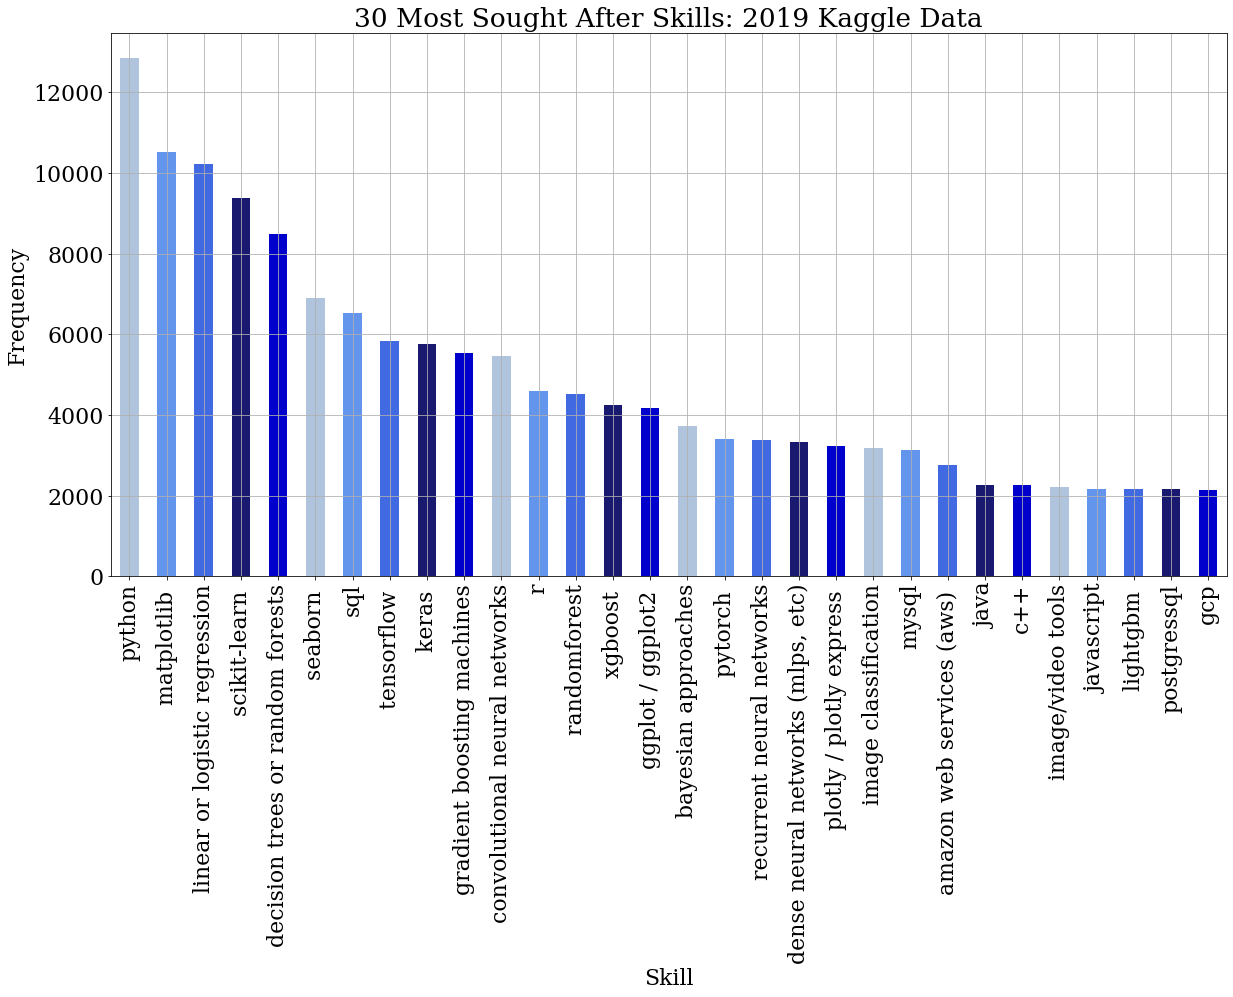

In [207]:
plt.figure(figsize=(20,10))
my_colors = ["lightsteelblue", "cornflowerblue", "royalblue", "midnightblue", "mediumblue"]*10

font = {'font.family' : 'serif',
        'font.size'   : 22,
        'font.weight' : 'normal'}
plt.rcParams.update(font)
ax = kaggle_skills.sum().sort_values(ascending=False)[:30].plot(kind="bar", color=my_colors)
plt.title("30 Most Sought After Skills: 2019 Kaggle Data")
plt.grid(True)
plt.xlabel("Skill")
plt.ylabel("Frequency")
plt.show()


In [14]:
# Indeed displays ~10-15 jobs on each page, while each job itself can be identify as a page.
# So we search jobs every 10 pages.
# For 1000+ jobs, we need to go through 100+ pages with 10+ jobs on each page. 
pages = list(range(0,1100,10))

def get_indeed_jobs():
    job_info = []
    for page in pages:
        result = requests.get("https://ca.indeed.com/jobs?q=data+analyst%2C+data+scientist&start="+str(page)).text
        soup = BeautifulSoup(result, 'lxml')

        if soup.find_all(class_ = "result") is None:
            return []
        for jobs in soup.find_all(class_ = "result"): 
            try:
                position_title = jobs.find('a', class_='jobtitle turnstileLink').text.strip()
            except:
                position_title = None

            try:
                employer = jobs.find('span', class_='company').text.strip()
            except:
                employer = None

            try:
                location = jobs.find('span', class_='location').text.strip()
            except:
                location = None

            try:
                salary = jobs.find('span', class_ = 'salaryText').text.strip()
            except:
                salary = None

            try:
                link = base + jobs.find('a').attrs['href']
            except:
                link = None

            job_info.append({
                'position_title': position_title, 
                'employer': employer,
                'location': location,
                'salary': salary,
                'link': link})

    return job_info
 
job_info = get_indeed_jobs()

In [16]:
print(len(job_info))
job_info_df = pd.DataFrame(job_info)
job_info_df.drop_duplicates(['link'], keep='first')
job_info_df["position_title"] = job_info_df["position_title"].replace('', np.nan)
job_info_df = job_info_df.dropna(subset=['position_title'])
print(job_info_df.shape)
print(job_info_df.head())

137
(137, 5)
                                      position_title  \
0                                       Data Analyst   
1  Information and Data Analyst, Population Healt...   
2                             Data Reporting Analyst   
3                                    Network Analyst   
4                                Junior Data Analyst   

                               employer       location             salary  \
0  Special Risk Insurance Managers Ltd.           None               None   
1                         Fraser Health     Surrey, BC               None   
2                     Small Business BC  Vancouver, BC     $27.26 an hour   
3                              OCI Inc.           None  $31 - $50 an hour   
4         GroupHEALTH Benefit Solutions     Surrey, BC               None   

   link  
0  None  
1  None  
2  None  
3  None  
4  None  


In [17]:
skills = kaggle_skills.columns.values
for skill in skills:
    job_info_df[skill] = np.zeros(len(job_info))
job_info_df.head()

,position_title,employer,location,salary,link,python,r,sql,c,c++,...,mysql,postgressql,sqlite,microsoft sql server,oracle database,microsoft access,aws relational database service,aws dynamodb,azure sql database,google cloud sql
0,Data Analyst,Special Risk Insurance Managers Ltd.,None,None,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Information and Data Analyst, Population Healt...",Fraser Health,"Surrey, BC",None,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Data Reporting Analyst,Small Business BC,"Vancouver, BC",$27.26 an hour,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Network Analyst,OCI Inc.,None,$31 - $50 an hour,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Junior Data Analyst,GroupHEALTH Benefit Solutions,"Surrey, BC",None,None,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
def get_job_details(job_info):
    for i in range(len(job_info)):
        link = requests.get(job_info.loc[i, 'link'])
        soup = BeautifulSoup(link.text, "lxml")
        try:
            text = soup.find('div', class_ = 'jobsearch-jobDescriptionText').text.strip().lower()
            # Text pre-processing
            text = re.sub(r'\,', ' ', text) 
            text = re.sub('/', ' ', text) 
            text = re.sub(r'\(', ' ', text) 
            text = re.sub(r'\)', ' ', text) 
            text = re.sub(' +',' ',text) 
        except:
            text = ""

        for s in skills :
            # This is specifically for C++, escape the ++. Convert C++ to C\+\+
            if any(x in s for x in ['+']):
                skill = re.escape(s)
            else:
                skill = s

            matching = re.search(r'(?:^|(?<=\s))' + skill + r'(?=\s|$)',text)
            if matching:
                job_info[s][i] = 1
    return job_info

In [20]:
job_info_details = get_job_details(job_info_df)

In [153]:
indeed_skills = job_info_details.drop(['employer', 'link', 'location', 'position_title', 'salary'], axis=1)
indeed_skills.to_csv('./indeed_skills.csv', index=True)
indeed_skills.head()

,python,r,sql,c,c++,java,javascript,typescript,bash,matlab,...,mysql,postgressql,sqlite,microsoft sql server,oracle database,microsoft access,aws relational database service,aws dynamodb,azure sql database,google cloud sql
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
kaggle_data_2018 = pd.read_csv('multiple_choice_responses_2018.csv')
kaggle_data_2018.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


In [22]:
for i in range(kaggle_data_2018.shape[1]):
    if "_Part_1" in kaggle_data_2018.columns[i] and len(kaggle_data_2018.columns[i]) < len("Q16_Part_14"):
        print("\nColumn Index =", i)
        print("Column Name =", kaggle_data_2018.columns[i])
        print(kaggle_data_2018.iloc[0, i])


Column Index = 14
Column Name = Q11_Part_1
Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions

Column Index = 29
Column Name = Q13_Part_1
Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Jupyter/IPython

Column Index = 45
Column Name = Q14_Part_1
Which of the following hosted notebooks have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Kaggle Kernels

Column Index = 57
Column Name = Q15_Part_1
Which of the following cloud computing services have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Google Cloud Platform (GCP)

Column Index = 65
Column Name = Q16_Part_1
What programming languages do you use on a regular basis? (Select all that apply) - S

From the above we can extract some questions that are particularly relevant to our analysis:

Column Index = 29  
Column Name = Q13_Part_1  
Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Jupyter/IPython

Column Index = 45  
Column Name = Q14_Part_1  
Which of the following hosted notebooks have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Kaggle Kernels

Column Index = 57  
Column Name = Q15_Part_1  
Which of the following cloud computing services have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Google Cloud Platform (GCP)

Column Index = 65  
Column Name = Q16_Part_1  
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python

Column Index = 88  
Column Name = Q19_Part_1  
What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice - Scikit-Learn

Column Index = 110  
Column Name = Q21_Part_1  
What data visualization libraries or tools have you used in the past 5 years? (Select all that apply) - Selected Choice - ggplot2
 
Column Index = 130  
Column Name = Q27_Part_1  
Which of the following cloud computing products have you used at work or school in the last 5 years (Select all that apply)? - Selected Choice - AWS Elastic Compute Cloud (EC2)
 
Column Index = 151  
Column Name = Q28_Part_1  
Which of the following machine learning products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Amazon Transcribe

Column Index = 195  
Column Name = Q29_Part_1  
Which of the following relational database products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - AWS Relational Database Service

Column Index = 224  
Column Name = Q30_Part_1  
Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - AWS Elastic MapReduce



In [73]:
questions = ["Q13", "Q14", "Q15", "Q16", "Q19", "Q21", "Q27", "Q28", "Q29", "Q30"]
question_columns = []
column_names_dict = dict()
for question in questions:
    for i in range(kaggle_data_2018.shape[1]):
        column = kaggle_data_2018.columns[i]
        if question in column and "OTHER" not in column:
            question_columns.append(column)
            start_index = kaggle_data_2018.iloc[0, i].index("-", \
                kaggle_data_2018.iloc[0, i].index("-")+1)
            column_rename_value = kaggle_data_2018.iloc[0, i][start_index+2:].lower()
            column_names_dict[column] = column_rename_value

# question_columns = ['Q13_Part_1', 'Q13_Part_2', 'Q13_Part_3', 'Q13_Part_4', 'Q13_Part_5', ...]

{'Q13_Part_1': 'jupyter/ipython', 'Q13_Part_2': 'rstudio', 'Q13_Part_3': 'pycharm', 'Q13_Part_4': 'visual studio code', 'Q13_Part_5': 'nteract', 'Q13_Part_6': 'atom', 'Q13_Part_7': 'matlab', 'Q13_Part_8': 'visual studio', 'Q13_Part_9': 'notepad++', 'Q13_Part_10': 'sublime text', 'Q13_Part_11': 'vim', 'Q13_Part_12': 'intellij', 'Q13_Part_13': 'spyder', 'Q13_Part_14': 'none', 'Q13_Part_15': 'other', 'Q14_Part_1': 'kaggle kernels', 'Q14_Part_2': 'google colab', 'Q14_Part_3': 'azure notebook', 'Q14_Part_4': 'domino datalab', 'Q14_Part_5': 'google cloud datalab', 'Q14_Part_6': 'paperspace', 'Q14_Part_7': 'floydhub', 'Q14_Part_8': 'crestle', 'Q14_Part_9': 'jupyterhub/binder', 'Q14_Part_10': 'none', 'Q14_Part_11': 'other', 'Q15_Part_1': 'google cloud platform (gcp)', 'Q15_Part_2': 'amazon web services (aws)', 'Q15_Part_3': 'microsoft azure', 'Q15_Part_4': 'ibm cloud', 'Q15_Part_5': 'alibaba cloud', 'Q15_Part_6': 'i have not used any cloud providers', 'Q15_Part_7': 'other', 'Q16_Part_1': 'pyth

In [218]:
kd_2018_qs = kaggle_data_2018[question_columns]

def one_hot(element):
    if element is np.nan:
        return 0
    return 1

for column in kd_2018_qs.columns:
    kd_2018_qs[column] = kd_2018_qs[column].map(one_hot)

kd_2018_qs = kd_2018_qs.rename(columns=column_names_dict)

In [219]:
kd_2018_qs = kd_2018_qs[1:]
print(kd_2018_qs.columns)
kd_2018_qs.drop(["i have not used any cloud providers", "none"], axis=1, inplace=True)
kd_2018_qs = kd_2018_qs.rename(columns={'google cloud platform (gcp)': 'gcp', 'amazon web services (aws)': 'aws'})
kd_2018_qs.head()

Index(['jupyter/ipython', 'rstudio', 'pycharm', 'visual studio code',
       'nteract', 'atom', 'matlab', 'visual studio', 'notepad++',
       'sublime text',
       ...
       'snowflake', 'databricks', 'azure sql data warehouse',
       'azure hdinsight', 'azure stream analytics',
       'ibm infosphere datastorage', 'ibm cloud analytics engine',
       'ibm cloud streaming analytics', 'none', 'other'],
      dtype='object', length=199)


,jupyter/ipython,rstudio,pycharm,visual studio code,nteract,atom,matlab,visual studio,notepad++,sublime text,...,sap iq,snowflake,databricks,azure sql data warehouse,azure hdinsight,azure stream analytics,ibm infosphere datastorage,ibm cloud analytics engine,ibm cloud streaming analytics,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


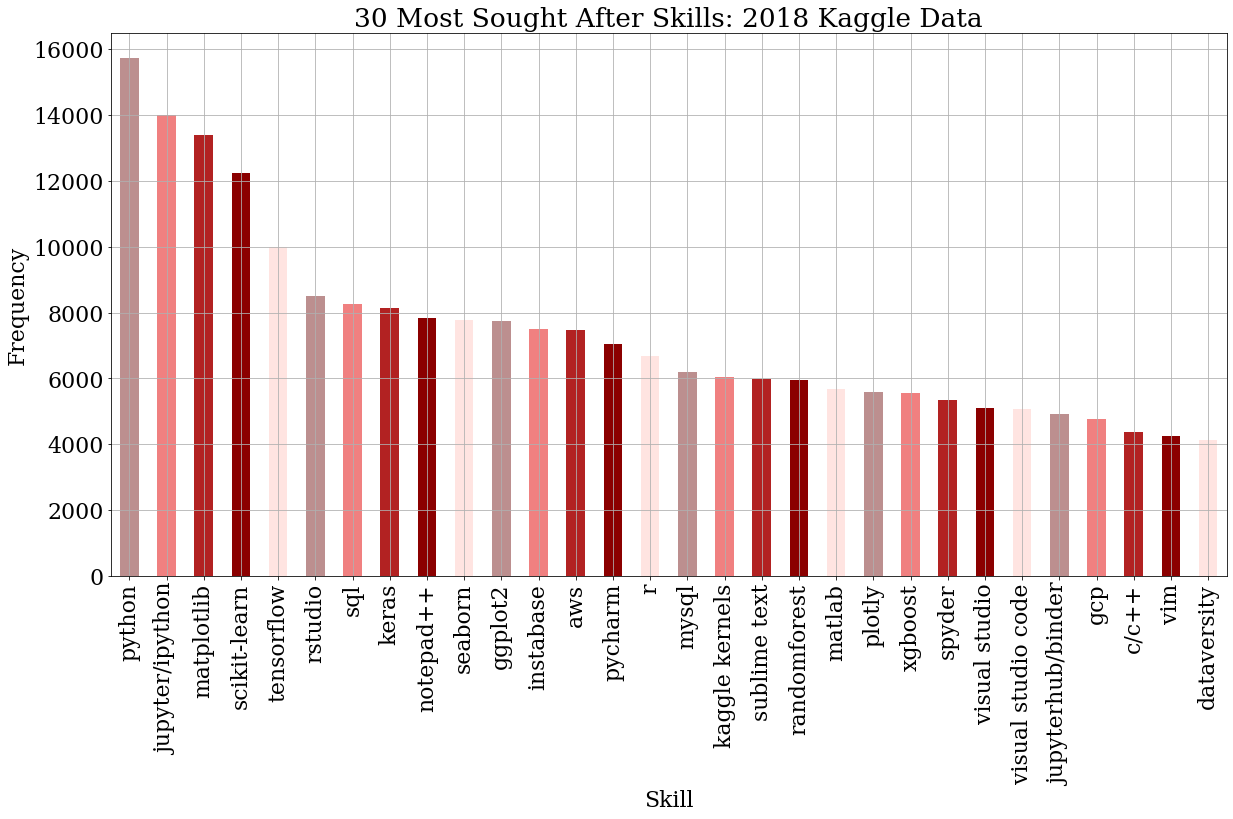

In [231]:
plt.figure(figsize=(20,10))
font = {'font.family' : 'serif',
        'font.size'   : 22,
        'font.weight' : 'normal'}
plt.rcParams.update(font)
my_colors = ["rosybrown", "lightcoral", "firebrick", "darkred", "mistyrose"]*12   

sorted_counts_2018 = kd_2018_qs.sum().sort_values(ascending=False)[:30].plot(kind="bar", color=my_colors)
plt.title("30 Most Sought After Skills: 2018 Kaggle Data")
plt.grid(True)
plt.xlabel("Skill")
plt.ylabel("Frequency")
plt.show()

In [221]:
kd_2018_qs.to_csv('./kaggle_skills_2018.csv', index=True)

In [94]:
# Use skills from 2018 kaggle survey data
skills_df = pd.read_csv('kaggle_skills_2018.csv')
sorted_counts_2018 = skills_df.sum().sort_values(ascending=False)
skills = sorted_counts_2018.index
skills = set([skill.strip().lower() for skill in skills])
skills.remove('other')
skills.remove('none')

In [95]:
# Read in the indeed job postings details
job_info = pd.read_csv('indeed_jobs.csv')
job_info.drop(['Unnamed: 0'], axis=1, inplace=True)

# Drop rows without description
job_info.replace("", np.nan, inplace=True)
job_info.dropna(subset = ['description'], inplace=True)
job_info.reset_index(drop=True, inplace=True)
job_info.head()

,employer,link,location,position_title,salary,description
0,STONE TILE INTERNATIONAL,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Replenishment Analyst,NaN,position: replenishment analystreports to: sen...
1,exactEarth Ltd.,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Data Scientist,NaN,about usexactearth is a data services company ...
2,Biolab Pharma,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Associate Scientist Formulation Development,"$54,000 - $66,000 a year",the formulation development associate scientis...
3,Canada Infrastructure Bank,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,"Analyst, Investments",NaN,headquartered in toronto the canada infrastruc...
4,Reconnect Community Health Services,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Decision Support Junior Analyst,$17 an hour,positions available: 3compensation: $17.00 per...


In [96]:
#initialize the skills column
for skill in skills:
  job_info[skill] = np.zeros(len(job_info))

job_info.reset_index(drop=True, inplace=True)
job_info.head()

,employer,link,location,position_title,salary,description,c#/.net,visual basic/vba,atom,ibm cloud container registry,...,vim,google cloud dataproc,azure stream analytics,google cloud spanner,oracle warehouse builder,amazon sagemaker,paperspace,ibm cloud db2,plotly,other.1
0,STONE TILE INTERNATIONAL,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Replenishment Analyst,NaN,position: replenishment analystreports to: sen...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,exactEarth Ltd.,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Data Scientist,NaN,about usexactearth is a data services company ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Biolab Pharma,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Associate Scientist Formulation Development,"$54,000 - $66,000 a year",the formulation development associate scientis...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Canada Infrastructure Bank,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,"Analyst, Investments",NaN,headquartered in toronto the canada infrastruc...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Reconnect Community Health Services,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Decision Support Junior Analyst,$17 an hour,positions available: 3compensation: $17.00 per...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
# Helper function for extracting the skills from job description
def extract_skills():
    for i in range(len(job_info)):
        for s in skills :
            # This is specifically for C++, escape the ++. Convert C++ to C\+\+
            if any(x in s for x in ['+']):
                skill = re.escape(s)
            else:
                skill = s
            description = job_info.loc[i, 'description']
            matching = re.search(r'(?:^|(?<=\s))' + skill + r'(?=\s|$)',description)
            
            if matching:
                job_info[s][i] = 1
                #print("matched skill ",s, "for job ",str(i+1))

In [98]:
extract_skills()
job_info.head()

,employer,link,location,position_title,salary,description,c#/.net,visual basic/vba,atom,ibm cloud container registry,...,vim,google cloud dataproc,azure stream analytics,google cloud spanner,oracle warehouse builder,amazon sagemaker,paperspace,ibm cloud db2,plotly,other.1
0,STONE TILE INTERNATIONAL,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Replenishment Analyst,NaN,position: replenishment analystreports to: sen...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,exactEarth Ltd.,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Data Scientist,NaN,about usexactearth is a data services company ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Biolab Pharma,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Associate Scientist Formulation Development,"$54,000 - $66,000 a year",the formulation development associate scientis...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Canada Infrastructure Bank,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,"Analyst, Investments",NaN,headquartered in toronto the canada infrastruc...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Reconnect Community Health Services,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Decision Support Junior Analyst,$17 an hour,positions available: 3compensation: $17.00 per...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
# Save the resulting dataframe to file
job_info.to_csv('./indeed_skills.csv', index=True)

In [222]:
indeed_skills = job_info.drop(['employer', 'link', 'location', 'position_title', 'salary', 'description'], axis=1)
indeed_skills.rename(columns={'google cloud platform (gcp)': 'gcp'}, inplace=True)

In [101]:
indeed_skills.head()

,c#/.net,visual basic/vba,atom,ibm cloud container registry,caret,xgboost,mxnet,google cloud bigtable,azure machine learning workbench,azure video api,...,vim,google cloud dataproc,azure stream analytics,google cloud spanner,oracle warehouse builder,amazon sagemaker,paperspace,ibm cloud db2,plotly,other.1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


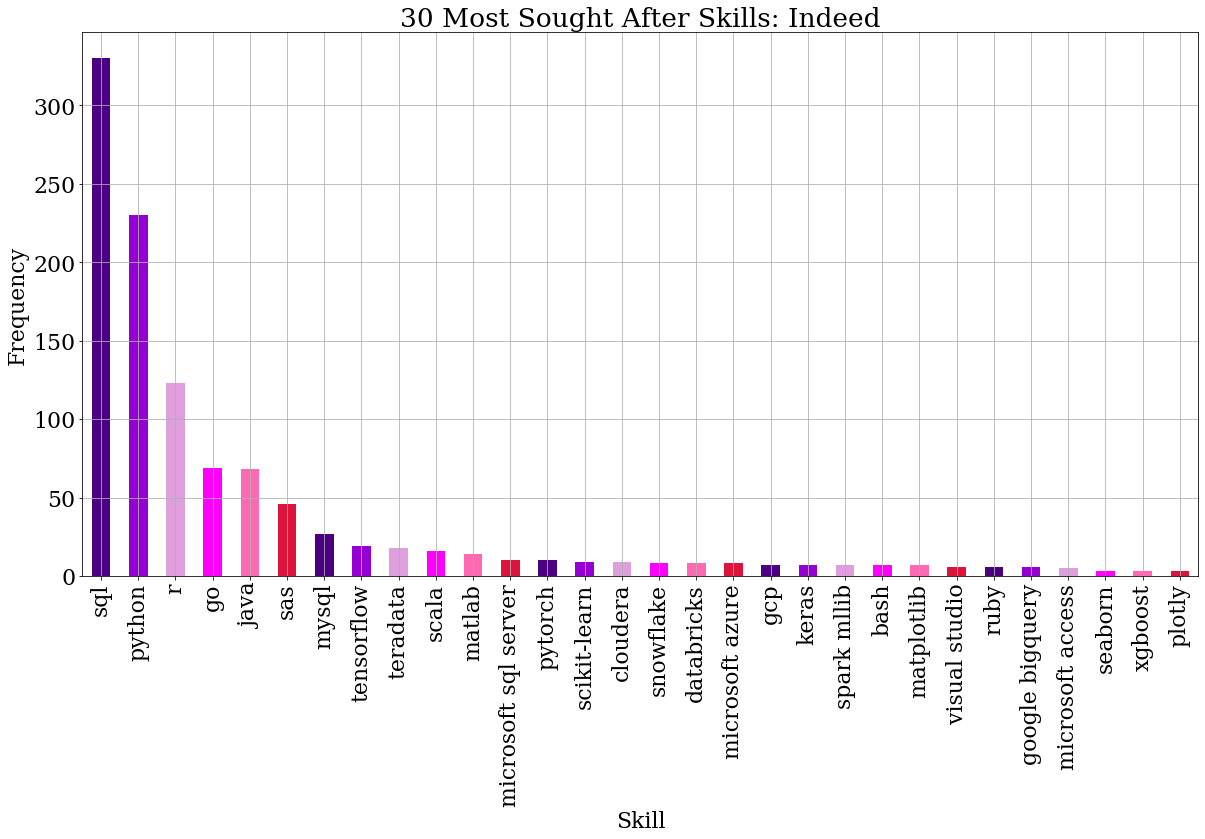

In [226]:
# Visualize the frequency of the skills in indeed job postings
plt.figure(figsize=(20,10))
font = {'font.family' : 'serif',
        'font.size'   : 22,
        'font.weight' : 'normal'}
plt.rcParams.update(font)
my_colors = ["indigo", "darkviolet", "plum", "magenta", "hotpink", "crimson"]*12

indeed_skills.sum().sort_values(ascending=False)[:30].plot(kind="bar", color=my_colors)
plt.title("30 Most Sought After Skills: Indeed")
plt.xlabel("Skill")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Clustering of Skills

Use hierachircal clustering to cluster the skills identified above. Each cluster could potentially represent closely related skills according to the dataset. Thus, the clusters can be used as topic (or give an idea of  topic) that can be added on the curriculum and elements of the cluster can inform the subtopics. (or something along these lines)

### Kaggle

In [37]:
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

In [39]:
# Helper function to run clustering
def run_clustering(df, n_clusters):
    
    df = pd.DataFrame(normalize(df), columns=df.columns)
    df = df.transpose()
    df.index.name = 'words'
    
    model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',
                                    compute_full_tree=True,linkage='ward')
    clusters = model.fit_predict(df)
    df["cluster_name"] = clusters

    df.reset_index(inplace=True)
    cluster_list = len(df["cluster_name"].unique())
    
    #Retrieve the elements of each cluster
    for cluster_number in range(cluster_list):
        print("="*20)
        print("Cluster %d: " % cluster_number)
        df_temp = df[df['cluster_name'] == cluster_number]
        df_temp = df_temp.drop(columns = 'cluster_name')
        print("Cluster size: ", len(df_temp))
        print(','.join(df_temp.words.tolist()))

In [64]:
kaggle_skills = pd.read_csv('kaggle_skills.csv')
print(kaggle_skills.columns)
kaggle_skills.head()

Index(['Unnamed: 0', 'python', 'r', 'sql', 'c', 'c++', 'java', 'javascript',
       'typescript', 'bash', 'matlab', ' ggplot / ggplot2 ', ' matplotlib ',
       ' altair ', ' shiny ', ' d3.js ', ' plotly / plotly express ',
       ' bokeh ', ' seaborn ', ' geoplotlib ', ' leaflet / folium ',
       'linear or logistic regression', 'decision trees or random forests',
       'gradient boosting machines (xgboost, lightgbm, etc)',
       'bayesian approaches', 'evolutionary approaches',
       'dense neural networks (mlps, etc)', 'convolutional neural networks',
       'generative adversarial networks', 'recurrent neural networks',
       'transformer networks (bert, gpt-2, etc)',
       'general purpose image/video tools (pil, cv2, skimage, etc)',
       'image segmentation methods (u-net, mask r-cnn, etc)',
       'object detection methods (yolov3, retinanet, etc)',
       'image classification and other general purpose networks (vgg, inception, resnet, resnext, nasnet, efficientnet, etc

,Unnamed: 0,python,r,sql,c,c++,java,javascript,typescript,bash,...,mysql,postgressql,sqlite,microsoft sql server,oracle database,microsoft access,aws relational database service,aws dynamodb,azure sql database,google cloud sql
0,1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
kaggle_skills = kaggle_skills.drop(['Unnamed: 0'], axis=1)
kaggle_skills.head()

In [236]:
run_clustering(kaggle_skills, 6)

Cluster 0: 
Cluster size:  3
r,sql, ggplot / ggplot2 
Cluster 1: 
Cluster size:  4
python, matplotlib , seaborn ,  scikit-learn 
Cluster 2: 
Cluster size:  68
c,c++,java,javascript,typescript,bash,matlab, altair , shiny , d3.js , plotly / plotly express , bokeh , geoplotlib , leaflet / folium ,bayesian approaches,evolutionary approaches,generative adversarial networks,recurrent neural networks,transformer networks (bert, gpt-2, etc),generative networks (gan, vae, etc),word embeddings/vectors (glove, fasttext, word2vec),encoder-decorder models (seq2seq, vanilla transformers),contextualized embeddings (elmo, cove),transformer language models (gpt-2, bert, xlnet, etc), caret , lightgbm , spark mlib , fast.ai ,gcp, amazon web services (aws) , microsoft azure , ibm cloud , alibaba cloud , salesforce cloud , oracle cloud , sap cloud , vmware cloud , red hat cloud ,google bigquery,aws redshift,databricks,aws elastic mapreduce,teradata,microsoft analysis services,google cloud dataflow,aws athe

TypeError: 'NoneType' object is not subscriptable

* From the bar chart earlier, python seems to be the most used programming language and from above, it belongs to its own cluster. We can decide to use python as the primary language for the course

* Cluster 2 looks like python libraries. We can add that to the curriculum

* Cluster 3 seems to be about Neural Networks. We can decide to add an intro to NN

* Cluster 4 & 5 seem to be supervised learning algorithms, so we can add that to the syllabus (with subtopics of linear or logistic regression,decision trees or random forests, xgboost

* Ignore cluster 8, because we decided to go with python

* Cluster 9: keep as NN libraries. Can combine this with cluster 3


### Kaggle 2018

In [66]:
kaggle_skills_2018 = pd.read_csv('kaggle_skills_2018.csv')
print(kaggle_skills_2018.columns)

kaggle_skills_2018 = kaggle_skills.drop('Unnamed: 0', axis=1)
kaggle_skills_2018.head()

Index(['Unnamed: 0', ' Jupyter/IPython', ' RStudio', ' PyCharm',
       ' Visual Studio Code', ' nteract', ' Atom', ' MATLAB', ' Visual Studio',
       ' Notepad++',
       ...
       ' Snowflake', ' Databricks', ' Azure SQL Data Warehouse',
       ' Azure HDInsight', ' Azure Stream Analytics',
       ' IBM InfoSphere DataStorage', ' IBM Cloud Analytics Engine',
       ' IBM Cloud Streaming Analytics', ' None.8', ' Other.9'],
      dtype='object', length=200)


,python,r,sql,c,c++,java,javascript,typescript,bash,matlab,...,mysql,postgressql,sqlite,microsoft sql server,oracle database,microsoft access,aws relational database service,aws dynamodb,azure sql database,google cloud sql
0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
run_clustering(kaggle_skills_2018, 10)

Cluster 0: 
Cluster size:  12
c,c++,java,javascript,bash,matlab, plotly / plotly express ,bayesian approaches, google cloud platform (gcp) , amazon web services (aws) ,mysql,postgressql
Cluster 1: 
Cluster size:  56
typescript, altair , shiny , d3.js , bokeh , geoplotlib , leaflet / folium ,evolutionary approaches,generative adversarial networks,recurrent neural networks,transformer networks (bert, gpt-2, etc),generative networks (gan, vae, etc),word embeddings/vectors (glove, fasttext, word2vec),encoder-decorder models (seq2seq, vanilla transformers),contextualized embeddings (elmo, cove),transformer language models (gpt-2, bert, xlnet, etc), caret , lightgbm , spark mlib , fast.ai , microsoft azure , ibm cloud , alibaba cloud , salesforce cloud , oracle cloud , sap cloud , vmware cloud , red hat cloud ,google bigquery,aws redshift,databricks,aws elastic mapreduce,teradata,microsoft analysis services,google cloud dataflow,aws athena,aws kinesis,google cloud pub/sub,sas,cloudera,azure 


### Indeed

In [41]:
#Remove skills that are not found in indeed job postings
indeed_df = indeed_skills.drop(columns=indeed_skills.columns[indeed_skills.sum()==0])
indeed_df.head()

,caret,xgboost,mxnet,mlr,spark mllib,d3,cloudera,scikit-learn,pytorch,keras,...,scala,bash,microsoft access,teradata,microsoft azure,r,ruby,microsoft sql server,ggplot2,plotly
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
run_clustering(indeed_df, 5)

Cluster 0: 
Cluster size:  40
caret,xgboost,mxnet,mlr,spark mllib,d3,cloudera,scikit-learn,pytorch,keras,sas,databricks,ibm cloud,visual studio,java,google compute engine,seaborn,google cloud platform (gcp),julia,azure cognitive services,snowflake,oracle database,matplotlib,php,rstudio,altair,matlab,mysql,aws redshift,tensorflow,google bigquery,scala,bash,microsoft access,teradata,microsoft azure,ruby,microsoft sql server,ggplot2,plotly
Cluster 1: 
Cluster size:  1
go
Cluster 2: 
Cluster size:  1
r
Cluster 3: 
Cluster size:  1
sql
Cluster 4: 
Cluster size:  1
python
